<a href="https://colab.research.google.com/github/Zike01/space-missions-analysis/blob/master/Space_Missions_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Introduction

<center><img src="https://i.imgur.com/9hLRsjZ.jpg" height=400></center>

This dataset was scraped from [nextspaceflight.com](https://nextspaceflight.com/launches/past/?page=1) and includes all the space missions since the beginning of Space Race between the USA and the Soviet Union in 1957!

### Install Package with Country Codes

In [4]:
#%pip install iso3166

### Upgrade Plotly

Run the cell below if you are working with Google Colab.

In [5]:
#%pip install --upgrade plotly

### Import Statements

In [6]:
import numpy as np
import pandas as pd
import plotly.express as px
import matplotlib.pyplot as plt
import seaborn as sns

# These might be helpful:
from iso3166 import countries
from datetime import datetime, timedelta
import matplotlib.dates as mdates

### Notebook Presentation

In [7]:
pd.options.display.float_format = '{:,.2f}'.format

# Create locators for ticks on the time axis
# Create locators for ticks on the time axis
years = mdates.YearLocator()
months = mdates.MonthLocator()
years_fmt = mdates.DateFormatter('%Y')


from pandas.plotting import register_matplotlib_converters
register_matplotlib_converters()

### Load the Data

In [8]:
df = pd.read_csv('mission_launches.csv')

# Preliminary Data Exploration

* What is the shape of `df_data`? 
* How many rows and columns does it have?
* What are the column names?
* Are there any NaN values or duplicates?

In [9]:
rows = df.shape[0]
columns = df.shape[1]

print(f"Number of rows: {rows}")
print(f"Number of columns: {columns}")


Number of rows: 4324
Number of columns: 9


In [10]:
df.columns

Index(['Unnamed: 0', 'Unnamed: 0.1', 'Organisation', 'Location', 'Date',
       'Detail', 'Rocket_Status', 'Price', 'Mission_Status'],
      dtype='object')

In [11]:
df.isna().values.any()

True

In [12]:
df.duplicated().any()

False

## Data Cleaning - Check for Missing Values and Duplicates

Consider removing columns containing junk data. 

In [13]:
df_data = df.dropna()

In [14]:
df_data.head()

,Unnamed: 0,Unnamed: 0.1,Organisation,Location,Date,Detail,Rocket_Status,Price,Mission_Status
0,0,0,SpaceX,"LC-39A, Kennedy Space Center, Florida, USA","Fri Aug 07, 2020 05:12 UTC",Falcon 9 Block 5 | Starlink V1 L9 & BlackSky,StatusActive,50.0,Success
1,1,1,CASC,"Site 9401 (SLS-2), Jiuquan Satellite Launch Ce...","Thu Aug 06, 2020 04:01 UTC",Long March 2D | Gaofen-9 04 & Q-SAT,StatusActive,29.75,Success
3,3,3,Roscosmos,"Site 200/39, Baikonur Cosmodrome, Kazakhstan","Thu Jul 30, 2020 21:25 UTC",Proton-M/Briz-M | Ekspress-80 & Ekspress-103,StatusActive,65.0,Success
4,4,4,ULA,"SLC-41, Cape Canaveral AFS, Florida, USA","Thu Jul 30, 2020 11:50 UTC",Atlas V 541 | Perseverance,StatusActive,145.0,Success
5,5,5,CASC,"LC-9, Taiyuan Satellite Launch Center, China","Sat Jul 25, 2020 03:13 UTC","Long March 4B | Ziyuan-3 03, Apocalypse-10 & N...",StatusActive,64.68,Success


In [15]:
df_data.shape

(964, 9)

## Descriptive Statistics

In [16]:
df_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 964 entries, 0 to 4020
Data columns (total 9 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   Unnamed: 0      964 non-null    int64 
 1   Unnamed: 0.1    964 non-null    int64 
 2   Organisation    964 non-null    object
 3   Location        964 non-null    object
 4   Date            964 non-null    object
 5   Detail          964 non-null    object
 6   Rocket_Status   964 non-null    object
 7   Price           964 non-null    object
 8   Mission_Status  964 non-null    object
dtypes: int64(2), object(7)
memory usage: 75.3+ KB


# Number of Launches per Company

Create a chart that shows the number of space mission launches by organisation.

In [17]:
number_of_launches = df_data.Organisation.value_counts()
number_of_launches

CASC               158
NASA               149
SpaceX              99
ULA                 98
Arianespace         96
Northrop            83
ISRO                67
MHI                 37
VKS RF              33
US Air Force        26
Roscosmos           23
Kosmotras           22
Rocket Lab          13
Eurockot            13
ILS                 13
Martin Marietta      9
Lockheed             8
Boeing               7
JAXA                 3
RVSN USSR            2
ExPace               1
Sandia               1
EER                  1
ESA                  1
Virgin Orbit         1
Name: Organisation, dtype: int64

In [18]:
fig = px.bar(x=number_of_launches.index,
             y=number_of_launches.values,
             color=number_of_launches.values,
             color_continuous_scale=px.colors.sequential.Viridis,
             hover_name=number_of_launches.index)

fig.update_layout(xaxis_title="Organisation",
                  yaxis_title="Number of Launches",
                  coloraxis_showscale=False)
fig.show()

# Number of Active versus Retired Rockets

How many rockets are active compared to those that are decomissioned? 

In [19]:
rocket_status = df_data.Rocket_Status.value_counts()
rocket_status

StatusActive     586
StatusRetired    378
Name: Rocket_Status, dtype: int64

In [20]:
print(f"Number of active rockets: {rocket_status[0]}")
print(f"Number of decomissioned rockets: {rocket_status[1]}")

Number of active rockets: 586
Number of decomissioned rockets: 378


In [21]:
fig = px.bar(x=rocket_status.index,
             y=rocket_status.values,
             color=rocket_status.values,
             hover_name=rocket_status.index)

fig.update_layout(xaxis_title="Rocket Status",
                  yaxis_title="Number of Rockets",
                  coloraxis_showscale=False)

fig.show()

# Distribution of Mission Status

How many missions were successful?
How many missions failed?

In [22]:
mission_status = df_data.Mission_Status.value_counts()
mission_status

Success              910
Failure               36
Partial Failure       17
Prelaunch Failure      1
Name: Mission_Status, dtype: int64

In [23]:
fig = px.bar(x=mission_status.index,
             y=mission_status.values,
             color=mission_status.values,
             hover_name=mission_status.index)

fig.update_layout(xaxis_title="Mission Status",
                  yaxis_title="Number of Missions",
                  coloraxis_showscale=False)

fig.show()

# How Expensive are the Launches? 

Create a histogram and visualise the distribution. The price column is given in USD millions (careful of missing values). 

In [24]:
df_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 964 entries, 0 to 4020
Data columns (total 9 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   Unnamed: 0      964 non-null    int64 
 1   Unnamed: 0.1    964 non-null    int64 
 2   Organisation    964 non-null    object
 3   Location        964 non-null    object
 4   Date            964 non-null    object
 5   Detail          964 non-null    object
 6   Rocket_Status   964 non-null    object
 7   Price           964 non-null    object
 8   Mission_Status  964 non-null    object
dtypes: int64(2), object(7)
memory usage: 75.3+ KB


The price column is stored as an object. We need to convert the price values into numeric data for our histogram to work.

In [25]:
# Replace the commas in the price column
df_data.Price = df_data.Price.astype(str).str.replace(',', '')

# Change values in the price column to numeric
df_data.Price = pd.to_numeric(df_data.Price)

/usr/local/lib/python3.7/dist-packages/pandas/core/generic.py:5170: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [26]:
df_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 964 entries, 0 to 4020
Data columns (total 9 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Unnamed: 0      964 non-null    int64  
 1   Unnamed: 0.1    964 non-null    int64  
 2   Organisation    964 non-null    object 
 3   Location        964 non-null    object 
 4   Date            964 non-null    object 
 5   Detail          964 non-null    object 
 6   Rocket_Status   964 non-null    object 
 7   Price           964 non-null    float64
 8   Mission_Status  964 non-null    object 
dtypes: float64(1), int64(2), object(6)
memory usage: 75.3+ KB


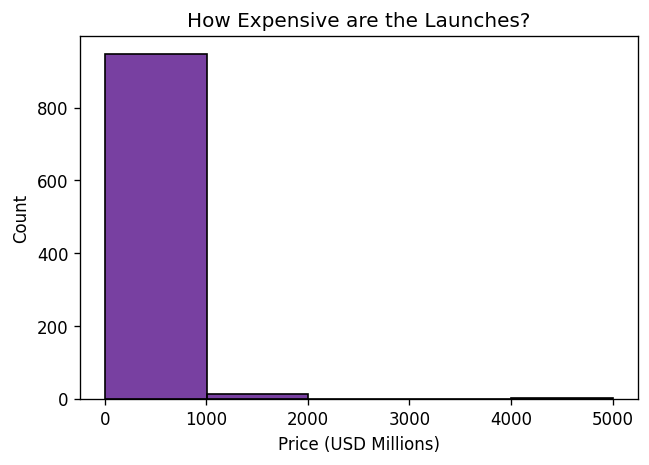

In [27]:
plt.figure(dpi=120)
sns.histplot(df_data,
             x="Price",
             bins=5,
             color="indigo")

plt.title("How Expensive are the Launches?")
plt.xlabel("Price (USD Millions)")
plt.show()

In [28]:
df_data[df_data.Price > 4000].count()

Unnamed: 0        2
Unnamed: 0.1      2
Organisation      2
Location          2
Date              2
Detail            2
Rocket_Status     2
Price             2
Mission_Status    2
dtype: int64

Most of the rocket launches cost 1 billion USD or under, and only two launches costed over 4 billion USD.

# Use a Choropleth Map to Show the Number of Launches by Country

* Create a choropleth map using [the plotly documentation](https://plotly.com/python/choropleth-maps/)
* Experiment with [plotly's available colours](https://plotly.com/python/builtin-colorscales/). I quite like the sequential colour `matter` on this map. 
* You'll need to extract a `country` feature as well as change the country names that no longer exist.

Wrangle the Country Names

You'll need to use a 3 letter country code for each country. You might have to change some country names.

* Russia is the Russian Federation
* New Mexico should be USA
* Yellow Sea refers to China
* Shahrud Missile Test Site should be Iran
* Pacific Missile Range Facility should be USA
* Barents Sea should be Russian Federation
* Gran Canaria should be USA


You can use the iso3166 package to convert the country names to Alpha3 format.

In [29]:
countries_list = []

# Extract the countries from each row in the Location column
for i in df_data.Location:
  countries_list.append(i.split(",")[-1].split()[0])

# Change some of the country names so that they can be converted into ISO codes

# Russia is the Russian Federation
# New Mexico should be USA
# Yellow Sea refers to China
# Shahrud Missile Test Site should be Iran
# Pacific Missile Range Facility should be USA
# Barents Sea should be Russian Federation
# Gran Canaria should be USA

for j, country in enumerate(countries_list):
  if country == "Russia" or country == "Barents Sea":
    countries_list[j] = "Russian Federation"
  elif country == "New" or country == "Pacific" or country == "Gran":
    countries_list[j] = "USA"
  elif country == "Yellow":
    countries_list[j] = "China"
  elif country == "Shahrud":
    countries_list[j] = "Iran"

df_data["Country"] = countries_list



/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:27: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [30]:
# Get the ISO alpha-3 code of each country
iso_codes = []
for c in df_data.Country:
  iso = countries.get(c).alpha3
  iso_codes.append(iso)

# Create a new column in df_data with the ISO codes
df_data["ISO"] = iso_codes


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:8: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [31]:
df_data.head()

,Unnamed: 0,Unnamed: 0.1,Organisation,Location,Date,Detail,Rocket_Status,Price,Mission_Status,Country,ISO
0,0,0,SpaceX,"LC-39A, Kennedy Space Center, Florida, USA","Fri Aug 07, 2020 05:12 UTC",Falcon 9 Block 5 | Starlink V1 L9 & BlackSky,StatusActive,50.00,Success,USA,USA
1,1,1,CASC,"Site 9401 (SLS-2), Jiuquan Satellite Launch Ce...","Thu Aug 06, 2020 04:01 UTC",Long March 2D | Gaofen-9 04 & Q-SAT,StatusActive,29.75,Success,China,CHN
3,3,3,Roscosmos,"Site 200/39, Baikonur Cosmodrome, Kazakhstan","Thu Jul 30, 2020 21:25 UTC",Proton-M/Briz-M | Ekspress-80 & Ekspress-103,StatusActive,65.00,Success,Kazakhstan,KAZ
4,4,4,ULA,"SLC-41, Cape Canaveral AFS, Florida, USA","Thu Jul 30, 2020 11:50 UTC",Atlas V 541 | Perseverance,StatusActive,145.00,Success,USA,USA
5,5,5,CASC,"LC-9, Taiyuan Satellite Launch Center, China","Sat Jul 25, 2020 03:13 UTC","Long March 4B | Ziyuan-3 03, Apocalypse-10 & N...",StatusActive,64.68,Success,China,CHN


In [32]:
launches_by_country = df_data.groupby('ISO', as_index=False).agg({'Country':pd.Series.count})
launches_by_country.columns = ['ISO', 'Nr. of Launches']
launches_by_country

,ISO,Nr. of Launches
0,CHN,159
1,FRA,95
2,IND,67
3,JPN,40
4,KAZ,46
5,RUS,54
6,USA,503


In [33]:
fig = px.choropleth(launches_by_country,
                    locations='ISO',
                    hover_name='ISO',
                    color='Nr. of Launches',
                    color_continuous_scale=px.colors.sequential.matter_r)
fig.show()

# Use a Choropleth Map to Show the Number of Failures by Country


In [34]:
df_failures = df_data[df_data["Mission_Status"] == "Failure"]

failures_by_country = df_failures.groupby('ISO', as_index=False).agg({'Country':pd.Series.count})
failures_by_country.columns = ['ISO', 'Nr. of Failures']
failures_by_country


,ISO,Nr. of Failures
0,CHN,4
1,FRA,2
2,IND,5
3,KAZ,2
4,RUS,1
5,USA,22


In [35]:
fig = px.choropleth(failures_by_country,
                    locations='ISO',
                    hover_name='ISO',
                    color='Nr. of Failures',
                    color_continuous_scale=px.colors.sequential.matter_r)
fig.show()

# Create a Plotly Sunburst Chart of the countries, organisations, and mission status. 

In [36]:
df_data.head()

,Unnamed: 0,Unnamed: 0.1,Organisation,Location,Date,Detail,Rocket_Status,Price,Mission_Status,Country,ISO
0,0,0,SpaceX,"LC-39A, Kennedy Space Center, Florida, USA","Fri Aug 07, 2020 05:12 UTC",Falcon 9 Block 5 | Starlink V1 L9 & BlackSky,StatusActive,50.00,Success,USA,USA
1,1,1,CASC,"Site 9401 (SLS-2), Jiuquan Satellite Launch Ce...","Thu Aug 06, 2020 04:01 UTC",Long March 2D | Gaofen-9 04 & Q-SAT,StatusActive,29.75,Success,China,CHN
3,3,3,Roscosmos,"Site 200/39, Baikonur Cosmodrome, Kazakhstan","Thu Jul 30, 2020 21:25 UTC",Proton-M/Briz-M | Ekspress-80 & Ekspress-103,StatusActive,65.00,Success,Kazakhstan,KAZ
4,4,4,ULA,"SLC-41, Cape Canaveral AFS, Florida, USA","Thu Jul 30, 2020 11:50 UTC",Atlas V 541 | Perseverance,StatusActive,145.00,Success,USA,USA
5,5,5,CASC,"LC-9, Taiyuan Satellite Launch Center, China","Sat Jul 25, 2020 03:13 UTC","Long March 4B | Ziyuan-3 03, Apocalypse-10 & N...",StatusActive,64.68,Success,China,CHN


In [37]:
country_org_status = df_data.groupby(["Country", "Organisation", "Mission_Status"], as_index=False).agg({"Detail" : pd.Series.count})
country_org_status.columns = ["Country", "Organisation", "Mission_Status", "Nr. of Missions"]
country_org_status.head()

,Country,Organisation,Mission_Status,Nr. of Missions
0,China,CASC,Failure,3
1,China,CASC,Partial Failure,3
2,China,CASC,Success,152
3,China,ExPace,Failure,1
4,France,Arianespace,Failure,2


In [38]:
burst = px.sunburst(country_org_status, 
                    path=["Country", "Organisation", "Mission_Status"], 
                    values="Nr. of Missions",
                    title="Where Do Launches Take Place?",
                   )
 
burst.update_layout(xaxis_title='Number of Missions', 
                    yaxis_title='Country',
                    coloraxis_showscale=False)
 
burst.show()

# Analyse the Total Amount of Money Spent by Organisation on Space Missions

In [39]:
money_spent = df_data.groupby("Organisation", as_index=False).agg({"Price" : pd.Series.sum})
money_spent.sort_values("Price", ascending=True, inplace=True)

In [40]:
h_bar = px.bar(money_spent,
               x="Price",
               y="Organisation",
               log_x=True,
               hover_name="Organisation",
               color="Price",
               color_continuous_scale=px.colors.sequential.Cividis,
               orientation="h",
               title="The Total Amount of Money Spent by Organisation on Space Launches")

h_bar.update_layout(xaxis_title="Total Amount of Money Spent (USD Millions)",
                    coloraxis_showscale=False,
                    font=dict(size=10)
                    )
h_bar.show()

# Analyse the Amount of Money Spent by Organisation per Launch

In [41]:
avg_money_spent = df_data.groupby("Organisation", as_index=False).agg({"Price" : pd.Series.mean})
avg_money_spent.sort_values("Price", ascending=True, inplace=True)

In [42]:
h_bar = px.bar(avg_money_spent,
               x="Price",
               y="Organisation",
               log_x=True,
               hover_name="Organisation",
               color="Price",
               color_continuous_scale=px.colors.sequential.Cividis,
               orientation="h",
               title="Amount of Money Spent by Organisation per Launch")

h_bar.update_layout(xaxis_title="Money Spent per Launch (USD Millions)",
                    coloraxis_showscale=False,
                    font=dict(size=10)
                    )
h_bar.show()

# Chart the Number of Launches per Year

In [43]:
df_data.Date = pd.to_datetime(df_data.Date, utc=True)

/usr/local/lib/python3.7/dist-packages/pandas/core/generic.py:5170: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [44]:
launch_year = pd.DatetimeIndex(df_data.Date).year
df_data["launch_year"] = launch_year

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [45]:
launches_per_year = df_data["launch_year"].value_counts()

In [46]:
fig = px.bar(x=launches_per_year.index,
             y=launches_per_year.values,
             color=launches_per_year.values,
             hover_name=launches_per_year.index,
             title="Number of Launches per Year")

fig.update_layout(xaxis_title="Year",
                  yaxis_title="Number of Launches",
                  coloraxis_showscale=False)
fig.show()

# Chart the Number of Launches Month-on-Month until the Present

Which month has seen the highest number of launches in all time? Superimpose a rolling average on the month on month time series chart. 

In [47]:
month_on_month_launches = df_data.groupby(pd.Grouper(key='Date',freq='M')).count()['Mission_Status']
df_rolling = month_on_month_launches.rolling(window=12).mean()

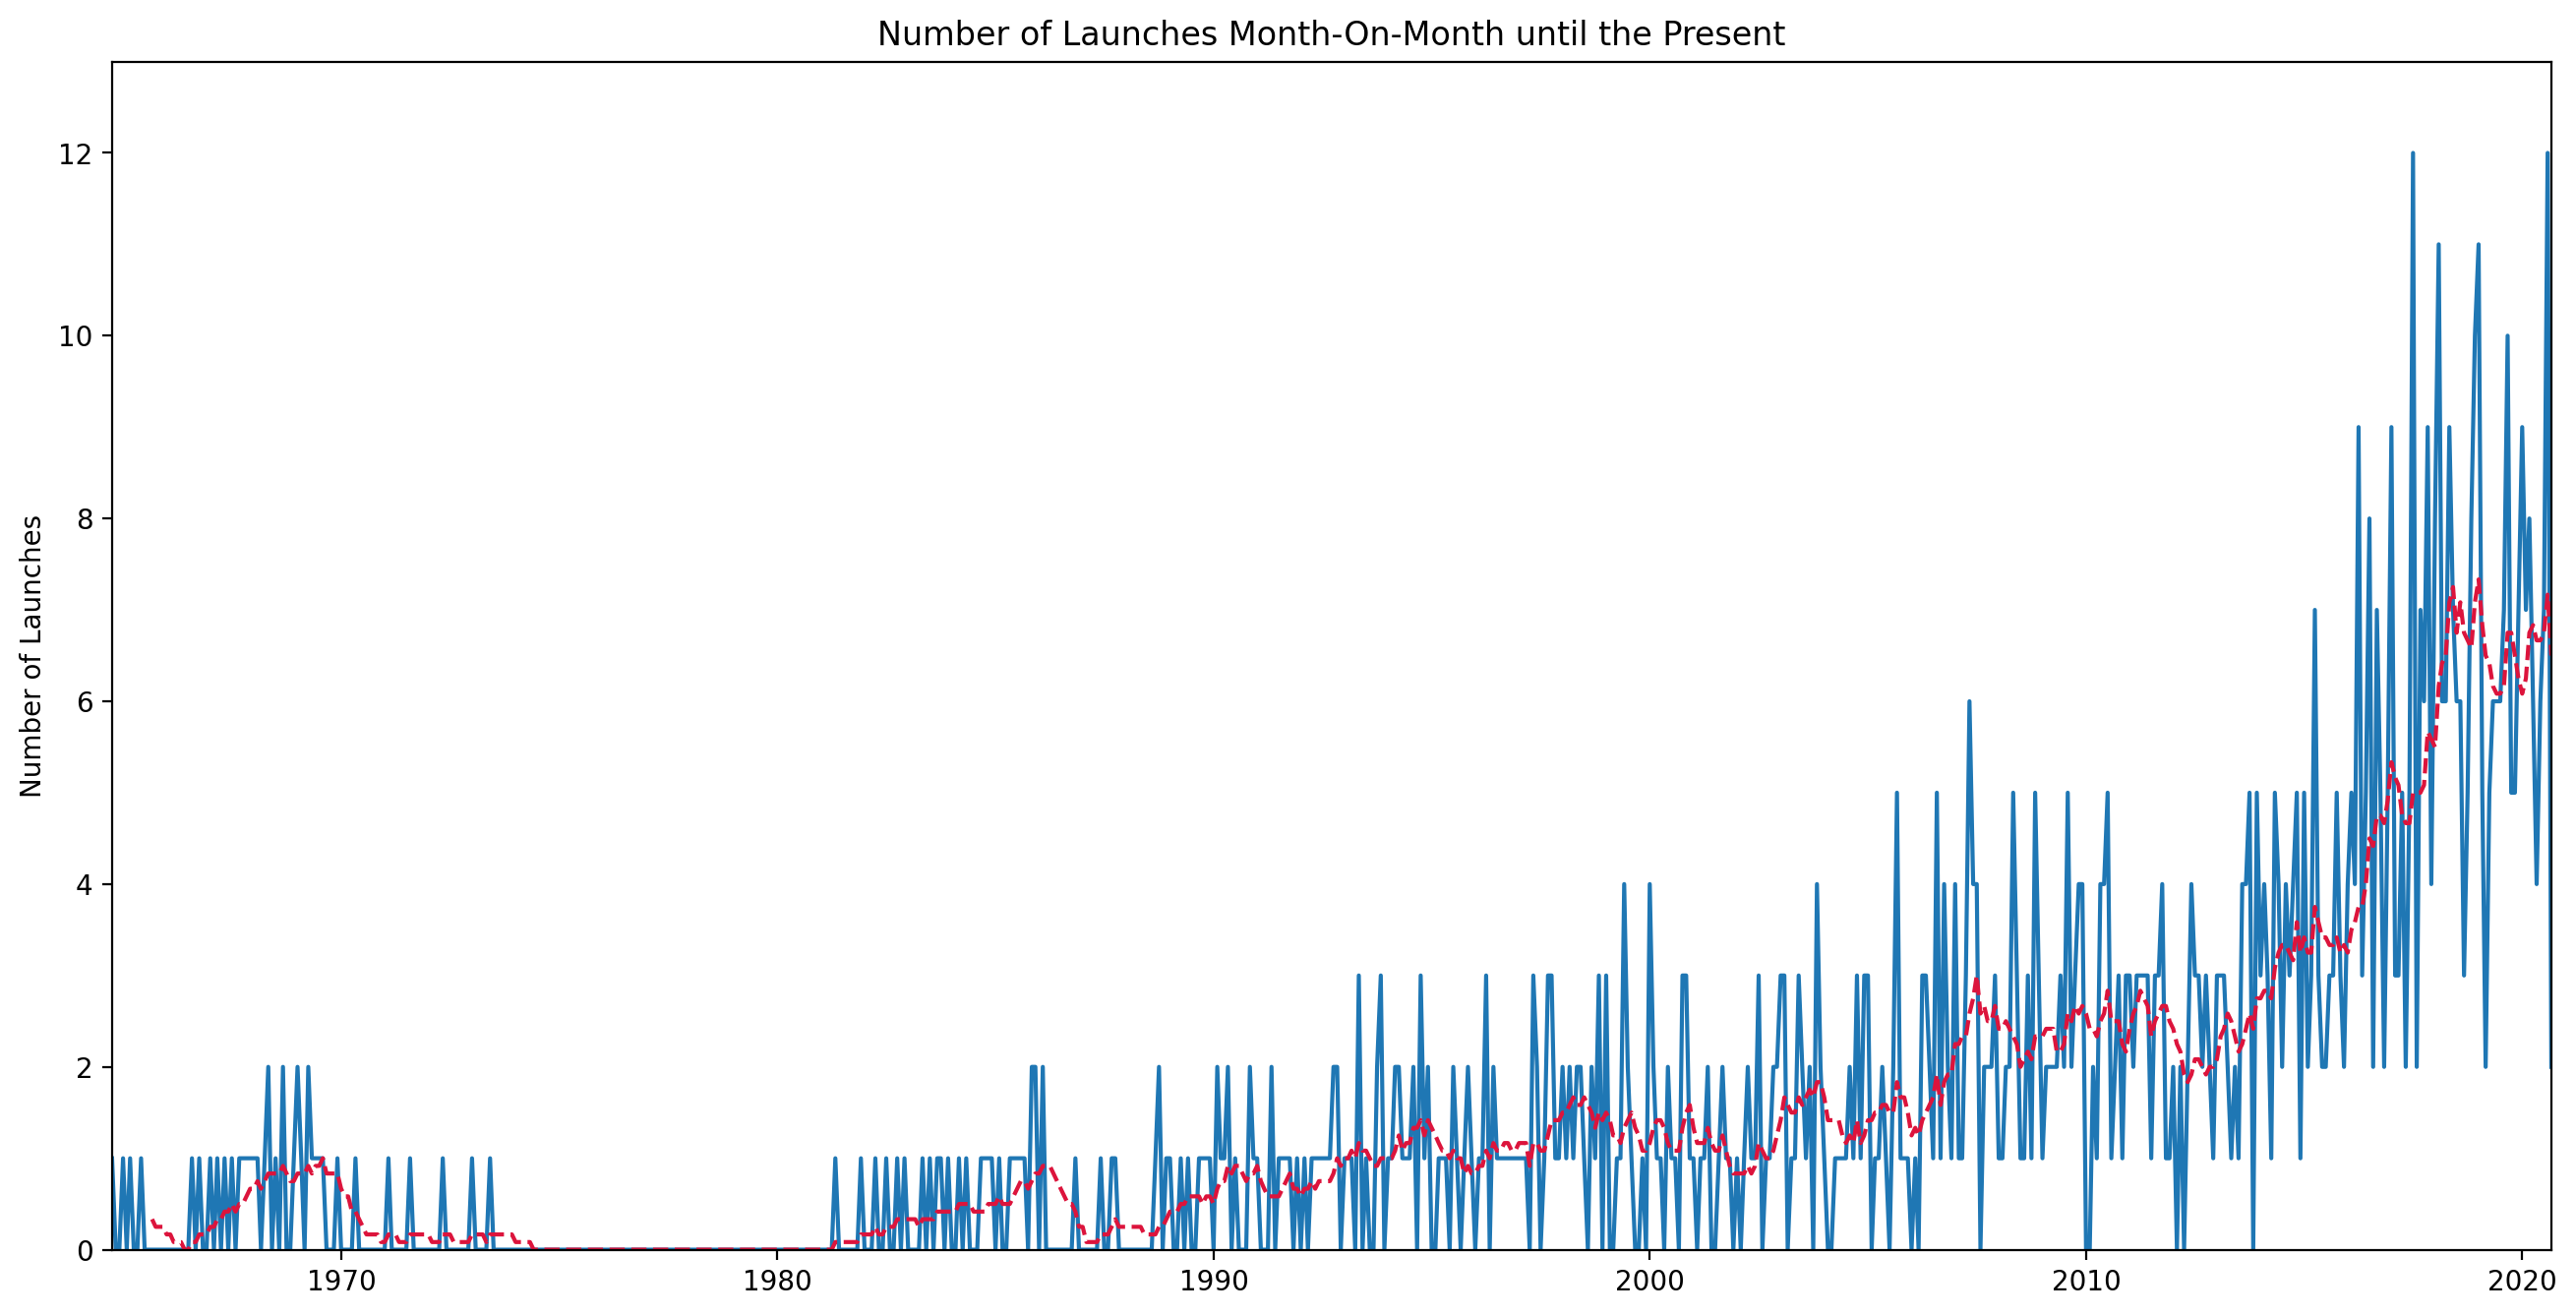

In [48]:
plt.figure(figsize=(16,8), dpi=200)
plt.title("Number of Launches Month-On-Month until the Present")

plt.ylim([0, 13])
plt.xlim([pd.Timestamp('1964-09-30'), pd.Timestamp('2020-08-31')])

plt.ylabel('Number of Launches')

# Plot month-on-month launches
plt.plot(month_on_month_launches.index,
         month_on_month_launches.values)

# Plot the rolling average
plt.plot(df_rolling.index,
         df_rolling.values,
         color='crimson',
         linestyle='dashed')

plt.show()

# Launches per Month: Which months are most popular and least popular for launches?

Some months have better weather than others. Which time of year seems to be best for space missions?

In [49]:
launch_month = pd.DatetimeIndex(df_data.Date).month
df_data["launch_month"] = launch_month

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [50]:
launches_per_month = df_data.groupby("launch_month", as_index=False).agg({"Mission_Status" : pd.Series.count})

In [51]:
months = ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul','Aug', 'Sep', 'Oct', 'Nov', 'Dec']
fig = px.bar(launches_per_month,
             x=months,
             y="Mission_Status",
             hover_name=months,
             title="Which Months Are The Most Popular and Least Popular For Launches?")
fig.update_layout(xaxis_title="Month",
                  yaxis_title="Number of Launches",)
fig.show()

# How has the Launch Price varied Over Time? 

Create a line chart that shows the average price of rocket launches over time. 

In [52]:
launch_prices = df_data.groupby('launch_year', as_index=False).agg({'Price' : pd.Series.mean})

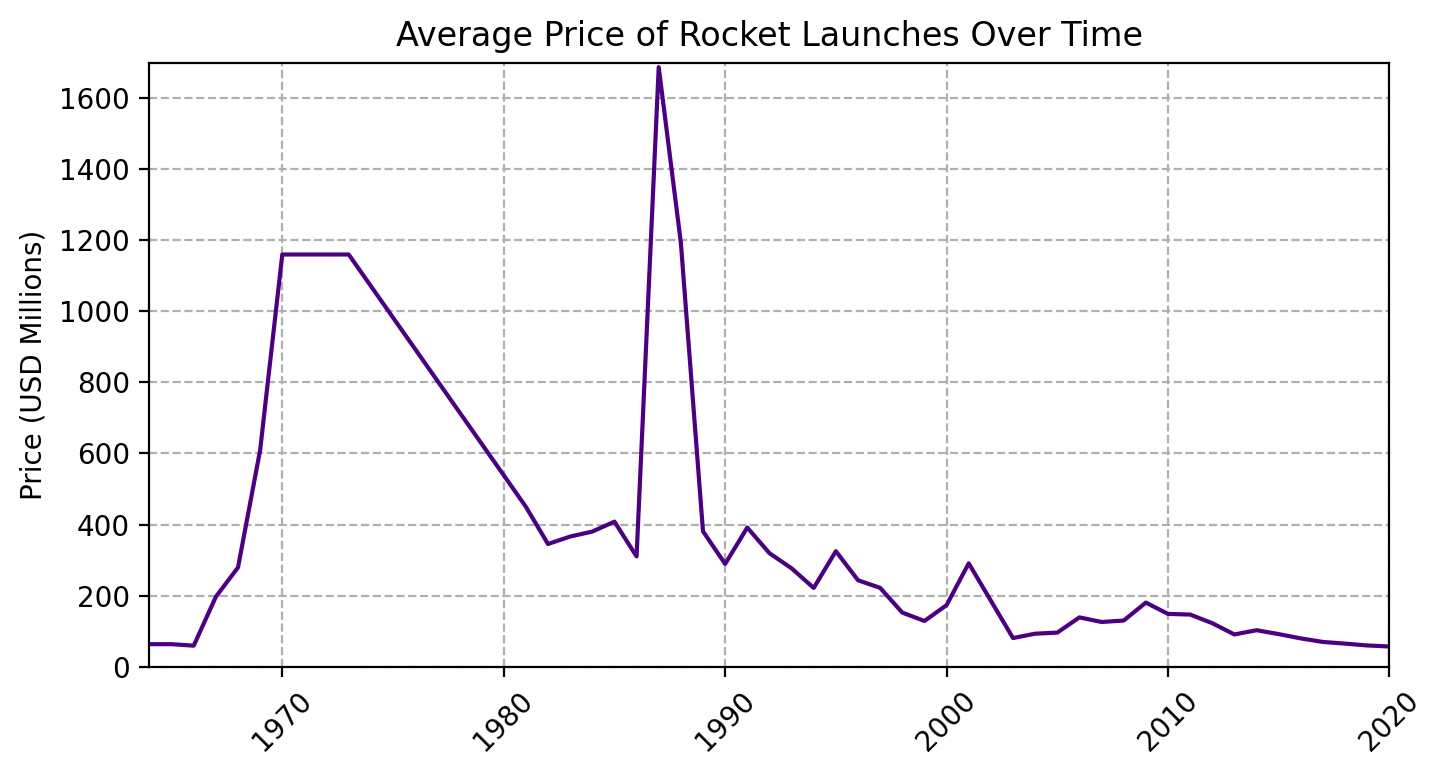

In [53]:
plt.figure(figsize=(8,4), dpi=200)
plt.title('Average Price of Rocket Launches Over Time')
plt.xticks(fontsize=10, rotation=45)
plt.yticks(fontsize=10)

ax = plt.gca() # Gets the current axis
ax.plot(launch_prices.launch_year,
         launch_prices.Price,
         color='indigo')


ax.set_ylabel('Price (USD Millions)')
ax.set_xlim([launch_prices.launch_year.min(), launch_prices.launch_year.max()])
ax.set_ylim([0, 1700])
ax.grid(axis='both', linestyle='--')


plt.show()